In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from scipy.fftpack import fftshift, ifftshift
import cmath
import numpy.fft as fft
import scipy.ndimage as nd
import scipy.misc as misc
from math import pi
import PIL
from PIL import Image
import PIL.ImageOps
import pylab


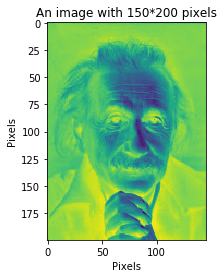

In [2]:
# Read Images 
filename = 'images.jpg'
img = mpimg.imread(filename)   
# Output Images 
plt.imshow(img) 
# Convert image to an array
rgb = Image.open(filename)

# Convert RGB data to brightness data
brightness = rgb.convert('L')

# Invert brightness so that white has the lowest "density"
inv_brightness = PIL.ImageOps.invert(brightness)
inv_brightness_arr = np.array(inv_brightness)

# Normalise brightness data
normalise = np.max(inv_brightness_arr)
img = inv_brightness_arr/normalise
"""/normalise"""
# Output final image
plt.title('An image with 150*200 pixels')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.imshow(img)
plt.show()
h, w = img.shape
phase = np.random.rand(h, w)



In [3]:
import math
import numpy as np


def GS(img, max_iter):
    """GS algorithm for recover the picture"""
    h, w = img.shape
    pm_s = np.random.rand(h, w)
    pm_f = np.ones((h, w))
    am_s = np.sqrt(img)
    am_f = np.ones((h, w))

    signal_s = am_s*np.exp(pm_s * 1j)

    for iter in range(max_iter):
        signal_f = np.fft.fft2(signal_s)
        pm_f = np.angle(signal_f)
        signal_f = am_f*np.exp(pm_f * 1j)
        signal_s = np.fft.ifft2(signal_f)
        pm_s = np.angle(signal_s)
        signal_s = am_s*np.exp(pm_s * 1j)

    pm =pm_f
    return pm,signal_s

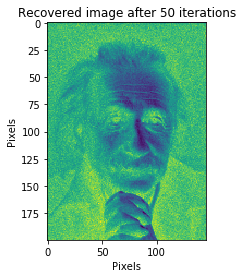

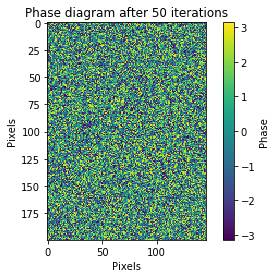

In [4]:
p=50
phase_mask=GS(img, p)[0]
recovery = np.fft.ifft2(np.exp(phase_mask * 1j))
img=np.absolute(recovery)**2
plt.title('Recovered image after %i iterations'%p)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.imshow(img)
plt.show()
plt.title('Phase diagram after %i iterations'%p)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.imshow(phase_mask)
plt.colorbar(label='Phase')
plt.show()

